<img style="float: right; margin: 0px 0px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQt6eQo8JPYzYO4p6WmxLtccdtJ4X8WR6GzVVKbsMjyGvUDEn1mg" width="300px" height="100px" />

# Trabajando con opciones

Una opción puede negociarse en el mercado secundario por lo que es importante determinar su valor $V_t$ para cada tiempo $t\in [0, T]$. La ganancia que obtiene quién adquiere la opción se llama función de pago o "payoff" y claramente depende del valor del subyacente. 

Hay una gran variedad de opciones en el mercado y éstas se clasiflcan según su función de pago y la forma en que pueden ejercerse.  Las opciones que tienen como función de pago a
$$ P(S(t),t)=max\{S(T)-K,0\} \rightarrow \text{En el caso de Call}$$ 
$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 
se llaman opciones **Vainilla**, con $h:[0,\infty) \to [0,\infty)$.

La opción se llama **europea** si puede ejercerse sólo en la fecha de vencimiento.

Se dice que una opción es **americana** si puede ejercerse en cualquier momento antes o en la fecha de vencimiento.

Una opción compleja popular son las llamadas **opciones asiáticas** cuyos pagos dependen de todas las trayectorias del precio de los activos subyacentes. Las opciones cuyos pagos dependen de las trayectorias de los precios de los activos subyacentes se denominan opciones dependientes de la ruta.

## Opciones Plan Vainilla: opción de compra y opción de venta europea

Una opción vainilla o estándar es una opción normal de compra o venta que no tiene características especiales o inusuales. Puede ser para tamaños y vencimientos estandarizados, y negociarse en un intercambio.
En comparación con otras estructuras de opciones, las opciones de vanilla no son sofisticadas o complicadas.


## 1. ¿Cómo descargar datos de opciones?

In [9]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

Usando el paquete `pandas_datareader` también podemos descargar datos de opciones. Por ejemplo, descarguemos los datos de las opciones cuyo activo subyacente son las acciones de Apple

In [11]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')

#closes = web.YahooDailyReader(ticker, start_date, end_date).read().sort_index('major_axis')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2018-04-20,2.5,call,AAPL180420C00002500,...,2018-04-13 20:00:05,2017-11-28 16:24:01,"{'contractSymbol': 'AAPL180420C00002500', 'str..."
2018-04-20,2.5,put,AAPL180420P00002500,...,2018-04-13 20:00:05,2017-09-23 03:55:28,"{'contractSymbol': 'AAPL180420P00002500', 'str..."
2018-10-19,2.5,call,AAPL181019C00002500,...,2018-04-13 20:00:05,2018-03-28 13:24:58,"{'contractSymbol': 'AAPL181019C00002500', 'str..."
2018-10-19,2.5,put,AAPL181019P00002500,...,2018-04-13 20:00:05,2018-04-07 03:57:30,"{'contractSymbol': 'AAPL181019P00002500', 'str..."
2018-04-20,5.0,call,AAPL180420C00005000,...,2018-04-13 20:00:05,2018-01-23 19:15:39,"{'contractSymbol': 'AAPL180420C00005000', 'str..."
...,...,...,...,...,...,...,...
2018-07-20,325.0,put,AAPL180720P00325000,...,2018-04-13 20:00:05,2018-01-13 04:45:00,"{'contractSymbol': 'AAPL180720P00325000', 'str..."
2018-10-19,335.0,call,AAPL181019C00335000,...,2018-04-13 20:00:05,2018-04-14 03:49:46,"{'contractSymbol': 'AAPL181019C00335000', 'str..."
2018-07-20,340.0,call,AAPL180720C00340000,...,2018-04-13 20:00:05,2018-01-26 19:12:28,"{'contractSymbol': 'AAPL180720C00340000', 'str..."


In [5]:
# aapl_opt.loc[0, 'JSON']
aapl_opt.loc[0, 'JSON']

{'ask': 167.5,
 'bid': 166.5,
 'change': -1.0,
 'contractSize': 'REGULAR',
 'contractSymbol': 'AAPL180420C00002500',
 'currency': 'USD',
 'expiration': 1524182400,
 'impliedVolatility': 1.0000000000000003e-05,
 'inTheMoney': True,
 'lastPrice': 170.95,
 'lastTradeDate': 1511886241,
 'openInterest': 5,
 'percentChange': -0.5815644,
 'strike': 2.5,
 'volume': 5}

Una vez tenemos la información, podemos consultar de qué tipo son las opciones

In [6]:
aapl_opt.loc[:, 'Type']

0       call
1        put
2       call
3        put
4       call
        ... 
1124     put
1125    call
1126    call
1127    call
1128    call
Name: Type, Length: 1129, dtype: object

o en que fecha expiran

In [5]:
aapl_opt.loc[:, 'Expiry']

0      2018-04-20
1      2018-04-20
2      2018-10-19
3      2018-10-19
4      2018-04-20
          ...    
1183   2018-07-20
1184   2018-10-19
1185   2018-07-20
1186   2018-10-19
1187   2018-05-18
Name: Expiry, dtype: datetime64[ns]

Por otra parte, podríamos querer consultar todas las opciones de compra (call) que expiran en cierta fecha (2018-06-15)

In [6]:
call06 = aapl_opt.loc[(aapl_opt.Expiry=='2018-06-15') & (aapl_opt.Type=='call')]
call06

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
42,70.0,2018-06-15,call,...,2018-04-12 23:59:28,2018-02-08 19:45:18,"{'contractSymbol': 'AAPL180615C00070000', 'str..."
50,75.0,2018-06-15,call,...,2018-04-12 23:59:28,2018-02-08 19:46:56,"{'contractSymbol': 'AAPL180615C00075000', 'str..."
62,80.0,2018-06-15,call,...,2018-04-12 23:59:28,2018-02-08 19:45:49,"{'contractSymbol': 'AAPL180615C00080000', 'str..."
75,85.0,2018-06-15,call,...,2018-04-12 23:59:28,2018-02-23 20:40:16,"{'contractSymbol': 'AAPL180615C00085000', 'str..."
91,90.0,2018-06-15,call,...,2018-04-12 23:59:28,2018-04-12 18:59:24,"{'contractSymbol': 'AAPL180615C00090000', 'str..."
...,...,...,...,...,...,...,...
1047,235.0,2018-06-15,call,...,2018-04-12 23:59:28,2018-03-21 14:53:42,"{'contractSymbol': 'AAPL180615C00235000', 'str..."
1061,240.0,2018-06-15,call,...,2018-04-12 23:59:28,2018-04-05 19:38:40,"{'contractSymbol': 'AAPL180615C00240000', 'str..."
1079,245.0,2018-06-15,call,...,2018-04-12 23:59:28,2018-03-19 19:36:32,"{'contractSymbol': 'AAPL180615C00245000', 'str..."
1093,250.0,2018-06-15,call,...,2018-04-12 23:59:28,2018-04-11 13:30:10,"{'contractSymbol': 'AAPL180615C00250000', 'str..."


## 2. ¿Qué es la volatilidad implícita?

**Volatilidad:** desviación estándar de los rendimientos.
- ¿Cómo se calcula?
- ¿Para qué calcular la volatilidad?

- **Para valuar derivados**, por ejemplo **opciones**.
- Método de valuación de riesgo neutral (se supone que el precio del activo $S_t$ no se ve afectado por el riesgo de mercado).

Recorderis de cuantitativas:
1. Ecuación de Black-Scholes
$$ dS(t) = \mu S(t) + \sigma S(t)dW_t$$
2. Solución de la ecuación

El valor de una opción Europea de vainilla $V_t$ puede obtenerse por:
$$V_t = F(t,S_t)$$ donde
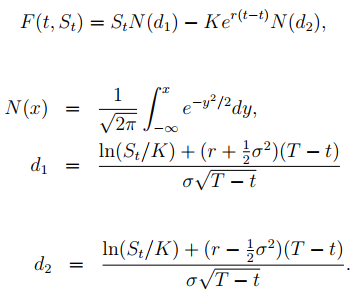
3. Opción de compra europea, suponiendo que los precios del activo son lognormales
4. Opción de venta europea, suponiendo que los precios del activo son lognormales

Entonces, ¿qué es la **volatilidad implícita**?

La volatilidad es una medida de la incertidumbre sobre el comportamiento futuro de un activo, que se mide habitualmente como la desviación típica de la rentabilidad de dicho activo. 

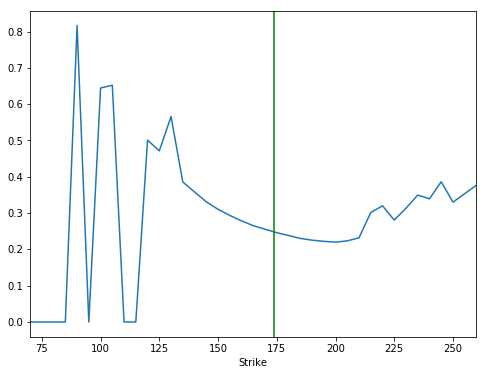

In [7]:
ax = call06.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(call06.Underlying_Price.iloc[0], color='g');

In [8]:
put06 = aapl_opt.loc[(aapl_opt.Expiry=='2018-06-15') & (aapl_opt.Type=='put')]
put06

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
43,70.0,2018-06-15,put,...,2018-04-12 23:59:28,2018-04-05 16:34:31,"{'contractSymbol': 'AAPL180615P00070000', 'str..."
51,75.0,2018-06-15,put,...,2018-04-12 23:59:28,2018-04-09 19:06:31,"{'contractSymbol': 'AAPL180615P00075000', 'str..."
63,80.0,2018-06-15,put,...,2018-04-12 23:59:28,2018-04-12 18:58:21,"{'contractSymbol': 'AAPL180615P00080000', 'str..."
76,85.0,2018-06-15,put,...,2018-04-12 23:59:28,2018-03-29 16:43:52,"{'contractSymbol': 'AAPL180615P00085000', 'str..."
92,90.0,2018-06-15,put,...,2018-04-12 23:59:28,2018-04-04 13:30:11,"{'contractSymbol': 'AAPL180615P00090000', 'str..."
...,...,...,...,...,...,...,...
994,220.0,2018-06-15,put,...,2018-04-12 23:59:28,2018-02-28 16:07:16,"{'contractSymbol': 'AAPL180615P00220000', 'str..."
1015,225.0,2018-06-15,put,...,2018-04-12 23:59:28,2018-04-05 14:03:27,"{'contractSymbol': 'AAPL180615P00225000', 'str..."
1031,230.0,2018-06-15,put,...,2018-04-12 23:59:28,2018-02-12 18:36:55,"{'contractSymbol': 'AAPL180615P00230000', 'str..."
1062,240.0,2018-06-15,put,...,2018-04-12 23:59:28,2018-02-17 04:46:07,"{'contractSymbol': 'AAPL180615P00240000', 'str..."


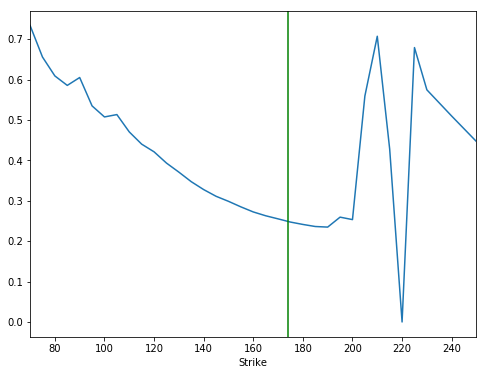

In [9]:
ax = put06.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06.Underlying_Price.iloc[0], color='g')

Con lo que hemos aprendido, deberíamos ser capaces de crear una función que nos devuelva un `DataFrame` de `pandas` con los precios de cierre ajustados de ciertas compañías en ciertas fechas:
- Escribir la función a continuación

In [12]:
def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.YahooDailyReader(ticker, start_date, end_date).read().sort_index('major_axis')
#     closes = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date).read()
#     index = pd.to_datetime(closes.loc['date',:,tickers[0]].values)
#     closes.set_axis(index, axis=1, inplace=True)
#     closes = closes.loc['adjclose']#.sort_index().dropna()
#     closes = pd.DataFrame(np.array(closes.as_matrix(), dtype=np.float64), columns=ticker, index=closes.index)
#     closes.index.name = 'Date'
    return closes.loc['Adj Close'].dropna()

- Obtener como ejemplo los precios de cierre de Apple del año pasado hasta la fecha. Graficar...

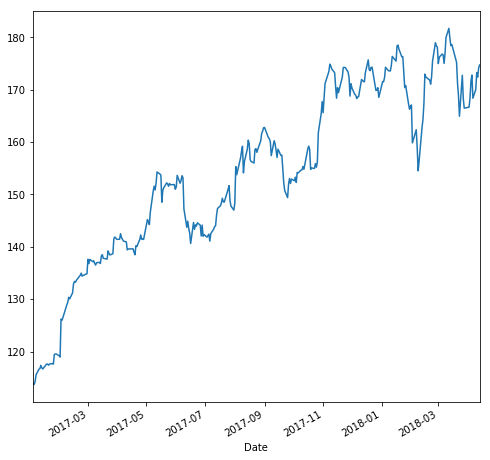

In [13]:
# ticker = ['AAPL']
ticker = ['AAPL','MSFT', 'AEROMEX.MX']
start_date = '2017-01-01'

closes = get_historical_closes(ticker, start_date)
closes_appl = closes.loc[:,'AAPL']
# assets_mx = get_historical_closes(ticker_mx, start_date_mx)
# closes_appl = get_historical_closes(['AAPL'], '2017-01-01')
# closes_appl.plot(figsize=(8,8))
closes_appl.plot(figsize=(8,8));

- Escribir una función que pasándole el histórico de precios devuelva los rendimientos logarítmicos:

In [14]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

- Graficar...

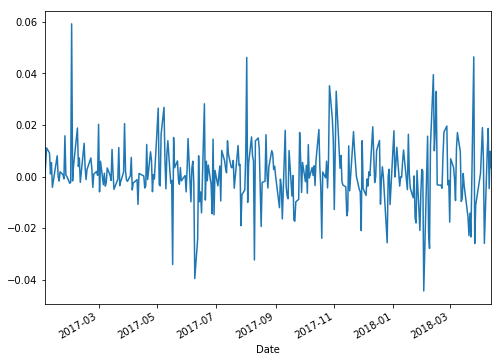

In [15]:
ret_aapl = calc_daily_ret(closes_appl)
ret_aapl.plot(figsize=(8,6));

También, descargar datos de opciones de Apple:

In [16]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2018-04-20,2.5,call,AAPL180420C00002500,...,2018-04-13 20:00:05,2017-11-28 16:24:01,"{'contractSymbol': 'AAPL180420C00002500', 'str..."
2018-04-20,190.0,put,AAPL180420P00190000,...,2018-04-13 20:00:05,2018-04-10 19:20:12,"{'contractSymbol': 'AAPL180420P00190000', 'str..."
2018-04-20,190.0,call,AAPL180420C00190000,...,2018-04-13 20:00:05,2018-04-13 19:58:20,"{'contractSymbol': 'AAPL180420C00190000', 'str..."
2018-04-20,187.5,put,AAPL180420P00187500,...,2018-04-13 20:00:05,2018-04-12 17:25:01,"{'contractSymbol': 'AAPL180420P00187500', 'str..."
2018-04-20,187.5,call,AAPL180420C00187500,...,2018-04-13 20:00:05,2018-04-13 19:55:55,"{'contractSymbol': 'AAPL180420C00187500', 'str..."
...,...,...,...,...,...,...,...
2020-06-19,250.0,call,AAPL200619C00250000,...,2018-04-13 20:00:05,2018-04-12 15:08:45,"{'contractSymbol': 'AAPL200619C00250000', 'str..."
2020-06-19,185.0,put,AAPL200619P00185000,...,2018-04-13 20:00:05,2018-04-12 18:01:47,"{'contractSymbol': 'AAPL200619P00185000', 'str..."
2020-06-19,95.0,put,AAPL200619P00095000,...,2018-04-13 20:00:05,2018-03-27 18:53:05,"{'contractSymbol': 'AAPL200619P00095000', 'str..."


In [17]:
aapl_opt.loc[(aapl_opt.Type=='call') & (aapl_opt.Strike==180) & (aapl_opt.Expiry=='2018-11-16')]

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
690,180.0,2018-11-16,call,...,2018-04-13 20:00:05,2018-04-13 17:29:03,"{'contractSymbol': 'AAPL181116C00180000', 'str..."


In [18]:
aapl_opt.loc[710,'JSON']

{'ask': 2.85,
 'bid': 2.78,
 'change': 0.0,
 'contractSize': 'REGULAR',
 'contractSymbol': 'AAPL180601C00182500',
 'currency': 'USD',
 'expiration': 1527811200,
 'impliedVolatility': 0.22779092529296874,
 'inTheMoney': False,
 'lastPrice': 2.8,
 'lastTradeDate': 1523677760,
 'openInterest': 1,
 'percentChange': 0.0,
 'strike': 182.5,
 'volume': 14}

## 2. Valuación usando simulación: modelo normal para los rendimientos

Comenzaremos por suponer que los rendimientos son un p.e. estacionario que distribuyen $\mathcal{N}(\mu,\sigma)$.

- Hallar media y desviación estándar muestral de los rendimientos

In [19]:
mu = ret_aapl.mean()
sigma = ret_aapl.std()
mu, sigma

(0.0013774318197553345, 0.012427464759306239)

No se toma la media sino la tasa libre de riesgo
> Referencia: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [20]:
# Tasa de bonos de 1 yr de fecha 04/11/18 -> 2.09%
r = 0.0209/360 # Tasa diaria

- Simularemos el tiempo de contrato (días=218) desde 12/04/18 hasta 16/11/18, 10 escenarios:
> Calculador de fechas: https://es.calcuworld.com/calendarios/calculadora-de-tiempo-entre-dos-fechas/
    
    - Generar fechas

In [21]:
ndays = 218
nscen = 10
dates = pd.date_range('2018-04-12', periods = ndays)
dates

DatetimeIndex(['2018-04-12', '2018-04-13', '2018-04-14', '2018-04-15',
               '2018-04-16', '2018-04-17', '2018-04-18', '2018-04-19',
               '2018-04-20', '2018-04-21',
               ...
               '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09',
               '2018-11-10', '2018-11-11', '2018-11-12', '2018-11-13',
               '2018-11-14', '2018-11-15'],
              dtype='datetime64[ns]', length=218, freq='D')

- Generamos 10 escenarios de rendimientos simulados y guardamos en un dataframe

In [22]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2018-04-12,1.827e-03,-1.805e-02,0.008,...,-0.010,-1.356e-02,-2.332e-03
2018-04-13,-3.854e-04,-1.165e-02,0.010,...,0.010,-1.796e-03,-2.141e-02
2018-04-14,-1.470e-02,9.644e-03,-0.010,...,0.002,8.021e-03,-4.875e-04
2018-04-15,-1.493e-02,5.306e-03,-0.033,...,0.015,-8.031e-03,-8.066e-03
2018-04-16,3.280e-03,-2.302e-02,0.008,...,-0.002,1.715e-02,5.982e-03
...,...,...,...,...,...,...,...
2018-11-11,4.609e-03,-2.498e-03,0.003,...,0.011,-1.025e-03,-9.313e-03
2018-11-12,1.031e-02,-1.119e-03,0.005,...,0.014,-3.610e-02,1.162e-02
2018-11-13,-1.628e-02,7.616e-03,0.017,...,0.027,-1.180e-02,-5.287e-04
2018-11-14,8.868e-05,-7.555e-04,-0.017,...,0.013,3.018e-04,3.151e-02


- Con los rendimientos simulados, calcular los escenarios de precios respectivos:

In [23]:
S0 = closes_appl.iloc[-1]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2018-04-12,175.050,171.604,176.175,...,173.069,172.377,174.323
2018-04-13,174.982,169.617,177.996,...,174.844,172.068,170.630
2018-04-14,172.428,171.261,176.255,...,175.116,173.454,170.547
2018-04-15,169.874,172.172,170.562,...,177.776,172.066,169.177
2018-04-16,170.432,168.254,172.006,...,177.507,175.043,170.192
...,...,...,...,...,...,...,...
2018-11-11,152.969,156.569,168.109,...,222.621,225.516,148.988
2018-11-12,154.554,156.394,169.014,...,225.766,217.520,150.730
2018-11-13,152.058,157.590,171.986,...,232.023,214.968,150.650
2018-11-14,152.072,157.471,169.171,...,235.145,215.033,155.473


- Graficar:

In [24]:
#sim_closes.plot(figsize=(8,6));

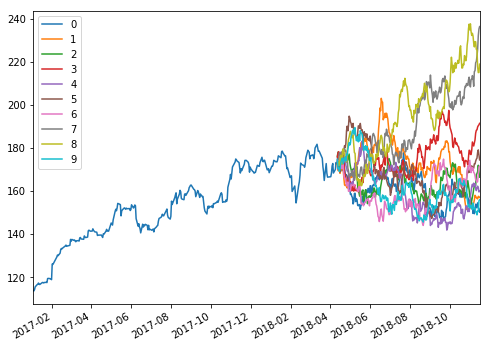

In [25]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_appl,sim_closes]).plot(figsize=(8,6));

In [26]:
K=180  # strike price
ndays = 218 
nscen = 100000
dates = pd.date_range('2018-04-12', periods = ndays)
S0 = closes_appl.iloc[-1]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);

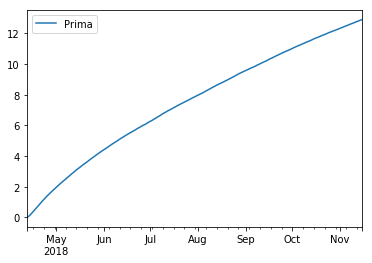

In [27]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike,np.zeros([ndays,nscen])).T.mean()}, index=dates)
call.plot();

La valuación de la opción es:

In [28]:
call.iloc[-1]

Prima    12.904
Name: 2018-11-15 00:00:00, dtype: float64

Intervalo de confianza del 95%

In [29]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(12.69770641076815, 13.109757286029117)
(12.69770641076815, 13.109757286029117)


### Análisis de la distribución de los rendimientos

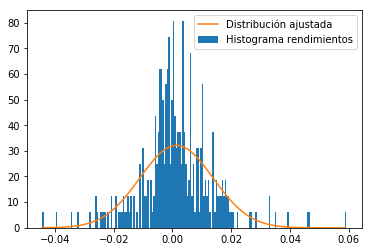

In [30]:
ren = calc_daily_ret(closes_appl) # rendimientos 
y,x,discar = plt.hist(ren,200,normed=True,label='Histograma rendimientos')
mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal

# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

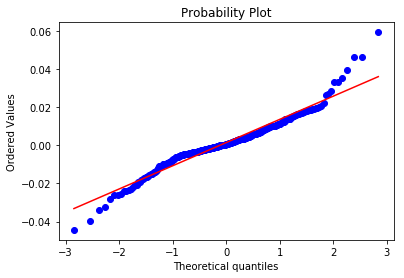

In [31]:
st.probplot(ren, dist='norm', plot=plt);

## 3. Valuación usando simulación: uso del histograma de rendimientos

Todo el análisis anterior se mantiene. Solo cambia la forma de generar los números aleatorios para la simulación montecarlo.

Ahora, generemos un histograma de los rendimientos diarios para generar valores aleatorios de los rendimientos simulados.

- Primero, cantidad de días y número de escenarios de simulación

In [32]:
ndays = 218 
nscen = 10

- Del histograma anterior, ya conocemos las probabilidades de ocurrencia, lo que se llamó como variable `y`

In [33]:
prob = y/np.sum(y)
values = x[1:]

- Con esto, generamos los números aleatorios correspondientes a los rendimientos (tantos como días por número de escenarios).

In [34]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range('2018-02-15',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2018-02-15,4.310e-03,6.860e-04,3.793e-03,...,1.518e-02,3.275e-03,-9.669e-03
2018-02-16,6.381e-03,5.919e-02,1.722e-03,...,6.860e-04,-5.527e-03,6.860e-04
2018-02-17,2.088e-02,-1.174e-02,-2.938e-03,...,1.682e-04,-3.974e-03,1.259e-02
2018-02-18,-4.492e-03,-1.692e-02,1.052e-02,...,6.381e-03,-3.456e-03,-2.313e-02
2018-02-19,-1.385e-03,-3.974e-03,-1.536e-02,...,-2.779e-02,-1.385e-03,-5.527e-03
...,...,...,...,...,...,...,...
2018-09-16,1.682e-04,-4.492e-03,-5.527e-03,...,1.001e-02,1.518e-02,-1.485e-02
2018-09-17,2.865e-02,3.793e-03,6.381e-03,...,-3.918e-02,7.935e-03,1.725e-02
2018-09-18,1.682e-04,-1.385e-03,-2.158e-02,...,-2.520e-02,-3.496e-04,6.860e-04
2018-09-19,-1.899e-02,7.417e-03,6.860e-04,...,1.052e-02,8.452e-03,1.208e-02


In [35]:
sim_closes_hist = (closes_appl.iloc[-1])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2018-02-15,175.485,174.850,175.394,...,177.403,175.303,173.049
2018-02-16,176.608,185.512,175.696,...,177.525,174.337,173.167
2018-02-17,180.334,183.347,175.181,...,177.555,173.645,175.362
2018-02-18,179.526,180.271,177.034,...,178.692,173.046,171.352
2018-02-19,179.278,179.556,174.335,...,173.794,172.807,170.408
...,...,...,...,...,...,...,...
2018-09-16,226.773,261.745,241.935,...,253.345,232.961,232.600
2018-09-17,233.363,262.740,243.484,...,243.610,234.817,236.648
2018-09-18,233.402,262.376,238.286,...,237.547,234.735,236.811
2018-09-19,229.012,264.329,238.450,...,240.060,236.728,239.688


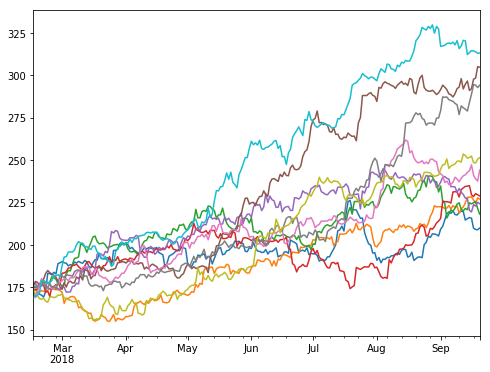

In [34]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

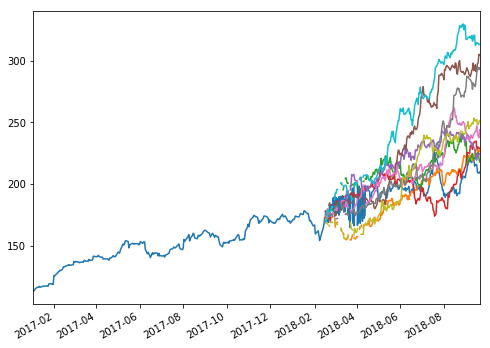

In [35]:
pd.concat([closes_appl,sim_closes_hist]).plot(figsize=(8,6),legend=False);

In [36]:
K=180
ndays = 218
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-02-15',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_appl.iloc[-1])*np.exp(sim_ret_hist.cumsum())

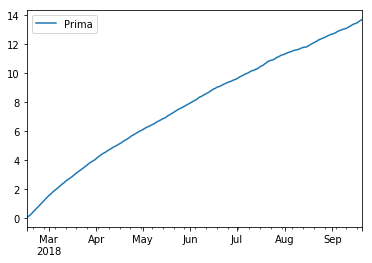

In [37]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
call_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
call_hist.plot();

In [38]:
call_hist.iloc[-1]

Prima    13.656
Name: 2018-09-20 00:00:00, dtype: float64

Intervalo de confianza del 95%

In [39]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(12.993563642944856, 14.319243909552181)
(12.993563642944856, 14.319243909552181)


# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez and modify by Oscar Jaramillo Z.
</footer>